### Convert 3D volumetric data to 2D images in different folders of 0 and 1

In [1]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import helpers as H
from tqdm import tqdm

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")
#train_data_paths = glob.glob(os.path.join(TRAIN_DATASET_PATH,'img_datas_1','*.npy'))
train_data_paths = os.listdir(os.path.join(TRAIN_DATASET_PATH, "img_datas_1"))
print(len(train_data_paths))


218


In [2]:
def to_3D(arr, resize_dim=None):
    '''Stack 2D slice to add dummy 3-channel dimension'''
    img = np.asarray(np.dstack((arr, arr, arr)), dtype=np.float64)
    if resize_dim is not None:
        img=cv2.resize(img,(resize_dim, resize_dim),interpolation=cv2.INTER_AREA)    
    else:
        pass
    return img

In [3]:
def get_number(filename):
    return int(filename[:filename.find('.')])

def sort_paths(paths):
    paths.sort(key = get_number)
    return paths

In [4]:
train_data_paths[:4]

['75.npy', '160.npy', '44.npy', '216.npy']

In [5]:
sort_paths(train_data_paths)[:5]

['1.npy', '2.npy', '3.npy', '4.npy', '5.npy']

In [6]:
y_train = np.load("y_train_clef.npy")
y_train.shape

(218, 2)

In [7]:
y_train_flat = np.array([np.argmax(x) for x in y_train])
y_train_flat.shape

(218,)

In [8]:
y_train_flat

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

### Test before and after saving slices

In [9]:
img = np.load("{}/img_datas_1/{}".format(TRAIN_DATASET_PATH, "1.npy"))
img.shape

(512, 512, 128)

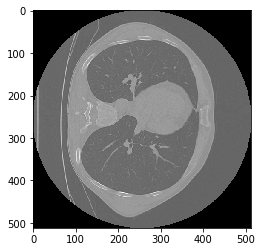

In [10]:
plt.imshow(img[:,:,55], cmap='gray')

-3024.0 2367.0


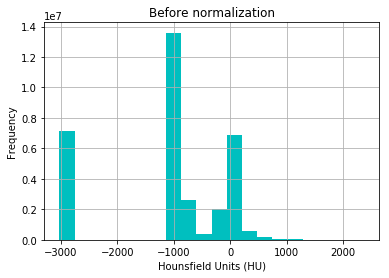

In [11]:
img_flat = img.flatten()
print(min(img_flat), max(img_flat))
plt.hist(img_flat, bins=20, color='c')
plt.title("Before normalization")
plt.xlabel("Hounsfield Units (HU)")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [12]:
img_norm = H.normalize(img)
img_norm.shape

(512, 512, 128)

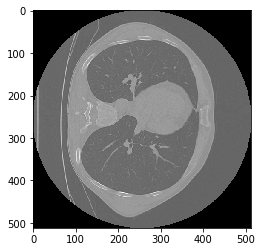

In [13]:
plt.imshow(img_norm[:,:,55], cmap='gray')

0.0 1.0


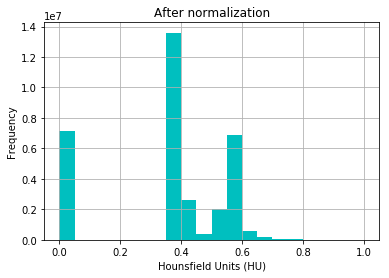

In [14]:
img_flat = img_norm.flatten()
print(min(img_flat), max(img_flat))
plt.hist(img_flat, bins=20, color='c')
plt.title("After normalization")
plt.xlabel("Hounsfield Units (HU)")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [15]:
img_norm.shape

(512, 512, 128)

In [16]:
x = H.center_crop(img_norm[:,:,55], (320, 320))
x.shape

(320, 320)

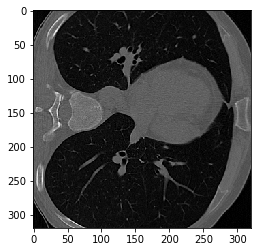

In [17]:
plt.imshow(x, cmap='gray')

In [18]:
a = img_norm[:,:,55]
a[250:252, 300:305]

array([[0.55240214, 0.573363  , 0.56445926, 0.55592656, 0.5475793 ],
       [0.55592656, 0.5676127 , 0.55759597, 0.54535335, 0.54275644]],
      dtype=float32)

In [19]:
cv2.imwrite("test.png", a * 255)

True

In [20]:
x = cv2.imread("test.png", 0)
x = x/255.0
x[250:252, 300:305]

array([[0.55294118, 0.57254902, 0.56470588, 0.55686275, 0.54901961],
       [0.55686275, 0.56862745, 0.55686275, 0.54509804, 0.54117647]])

In [21]:
!rm "test.png"

In [26]:
low_paths = os.path.join(TRAIN_DATASET_PATH, "2D_images/0")
high_paths = os.path.join(TRAIN_DATASET_PATH, "2D_images/1")
low_paths, high_paths

('/home/hasib/ecir2020/2D/dataset/2D_images/0',
 '/home/hasib/ecir2020/2D/dataset/2D_images/1')

In [27]:
H.create_directory(os.path.join(low_paths))
H.create_directory(os.path.join(high_paths))

In [28]:
x_train_2D = []
y_train_2D = []

img_number = 1
for array_path, label in zip(sort_paths(train_data_paths)[:5], y_train_flat):
    img = np.load("{}/img_datas_1/{}".format(TRAIN_DATASET_PATH, array_path))
    print(array_path, "-----", img.shape, "---", label)
    
    slice_number = img.shape[-1]
    if label == 0:
        for slc in range(slice_number):
            
            # Save all slices as numpy array
            #x_train_2D.append(img[:,:,slc])
            #y_train_2D.append(0)
            
            # 0 folder
            #np.save("{}/{}_{}.npy".format(low_paths, img_number, slc), img[:,:,slc]) 
            
            img_slc = H.normalize(img[:,:,slc]) # Normalize image
            img_slc = H.center_crop(img_slc, (299, 299))
            cv2.imwrite("{}/{}_{}.png".format(low_paths, img_number, slc),img_slc * 255)
            img_slc = None
            
    else:
        for slc in range(slice_number):
            
            # Save all slices as numpy array
            #x_train_2D.append(img[:,:,slc])
            #y_train_2D.append(1)
            
            # 1 folder
            #np.save("{}/{}_{}.npy".format(high_paths, img_number, slc), img[:,:,slc])
            
            img_slc = H.normalize(img[:,:,slc]) # Normalize image
            img_slc = H.center_crop(img_slc, (299, 299))
            cv2.imwrite("{}/{}_{}.png".format(high_paths, img_number, slc),img_slc * 255)
            img_slc = None
    
    img_number+=1

1.npy ----- (512, 512, 128) --- 0
2.npy ----- (512, 512, 122) --- 0
3.npy ----- (512, 512, 113) --- 0
4.npy ----- (512, 512, 120) --- 0
5.npy ----- (512, 512, 116) --- 1


### Remember to rescale using img/255.0 after loading images

```
img = cv2.imread("test.png", 0)
img = x/255.0 # Rescale to 0-1
```

In [29]:
len(os.listdir(low_paths)), len(os.listdir(high_paths))

(483, 116)

In [30]:
#x_train_2D = np.array(x_train_2D)
#y_train_2D = np.array(y_train_2D)
#x_train_2D.shape, y_train_2D.shape

In [31]:
#np.count_nonzero(y_train_2D == 1), np.count_nonzero(y_train_2D == 0)

In [32]:
a = y_train_flat[196:]
len(a)

22

In [33]:
np.count_nonzero(a == 1), np.count_nonzero(a == 0)

(11, 11)